## Final Project Submission

Please fill out:
* Student name: Scott Okamura
* Student pace: self paced
* Scheduled project review date/time: July 16, Thursday, 6am HST
* Instructor name: Jeff Herman
* Blog post URL:


The movie industry is said to be a dying tradition.  People are taking advantage of cheaper and more convenient options such as streaming to your smart TV or smartphone. But in 2018, the global box office raked in $41.8 billion in movie ticket sales. That still made up 45\% of the total theater and home entertainment market revenue. Since Microsoft wants to try to get into the movie business, this notebook will analyze movie data such as:
- global trend line for movie ticket sales in the last 10 years
- comparing different benchmarks for success in movies
    - gross sales
    - profit margin
    - return on investment
- relationships between each benchmark
- data based movie production recommendations for a new movie studio

It will also be answering the following 5 questions:

### 1. What were the top 5 grossing movies since 2010?
### 2. What were the top 5 grossing film genres since 2010?
### 3. Who were the directors/writers for the top 5 grossing movies since 2010?
### 4. Is gross sales the best indicator of a successful movie? Profit? Return on investment?
### 5. Which movie genres had the highest ROI since 2010?

## Importing necessary packages

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline
import sqlite3
from pandasql import sqldf
import seaborn as sns

In [61]:
pysqldf = lambda q: sqldf(q, globals())

## Reading files and saving as separate dataframes

In [5]:
dfnames = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
dfnames

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [63]:
dfprincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
dfprincipals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [64]:
dfgross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
dfgross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [65]:
dfinfo = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter = '\t')
dfinfo.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [66]:
dfratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
dfratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [67]:
dftitles = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
dftitles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [68]:
dfreviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'latin-1')
dfreviews['date'] = pd.to_datetime(dfreviews['date']) #reformating from object to datetime

In [69]:
dfbudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
dfbudgets['release_date'] = pd.to_datetime(dfbudgets['release_date']) #reformating from object to datetime

## Investigate data types in dataframes

In [71]:
dfbudgets['worldwide_gross'] #all money related numbers entered as obj, need to convert to int

0       $2,776,345,279
1       $1,045,663,875
2         $149,762,350
3       $1,403,013,963
4       $1,316,721,747
             ...      
5777                $0
5778          $240,495
5779            $1,338
5780                $0
5781          $181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [72]:
dfbudgets['worldwide_gross'] = dfbudgets['worldwide_gross'].str.replace('$','') #stripping symbols and commas from 
dfbudgets['worldwide_gross'] = dfbudgets['worldwide_gross'].str.replace(',','') #objects to change into integers
dfbudgets['worldwide_gross'] = dfbudgets['worldwide_gross'].str.strip()
dfbudgets['worldwide_gross'] = dfbudgets['worldwide_gross'].astype(int)

In [73]:
dfbudgets['worldwide_gross'] # check to make sure content of data wasn't changed, only type

0       2776345279
1       1045663875
2        149762350
3       1403013963
4       1316721747
           ...    
5777             0
5778        240495
5779          1338
5780             0
5781        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [74]:
dfbudgets.sort_values('worldwide_gross', ascending = False).head(20) #check if columns are sorting correctly

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625",2776345279
42,43,1997-12-19,Titanic,"$200,000,000","$659,363,944",2208208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225",2053311220
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482",2048134200
33,34,2015-06-12,Jurassic World,"$215,000,000","$652,270,625",1648854864
66,67,2015-04-03,Furious 7,"$190,000,000","$353,007,020",1518722794
26,27,2012-05-04,The Avengers,"$225,000,000","$623,279,547",1517935897
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868",1403013963
41,42,2018-02-16,Black Panther,"$200,000,000","$700,059,566",1348258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157",1341693157


In [75]:
dfbudgets['domestic_gross'] = dfbudgets['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
dfbudgets['domestic_gross']

0       760507625
1       241063875
2        42762350
3       459005868
4       620181382
          ...    
5777            0
5778        48482
5779         1338
5780            0
5781       181041
Name: domestic_gross, Length: 5782, dtype: int64

In [79]:
dfbudgets['production_budget'] = dfbudgets['production_budget'].str.replace(',','').str.replace('$','').str.strip().astype(int)

In [80]:
dfbudgets['production_budget']

0       425000000
1       410600000
2       350000000
3       330600000
4       317000000
          ...    
5777         7000
5778         6000
5779         5000
5780         1400
5781         1100
Name: production_budget, Length: 5782, dtype: int64

In [81]:
dfbudgets.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

## Cleaning data
### Duplicates

In [82]:
dftitles.drop_duplicates('primary_title',inplace=True)

### Nulls

In [83]:
dfcrew = pd.read_csv('imdb.title.crew.csv.gz')
len(dfcrew),dfcrew.isnull().sum() #checking for null values in directors/writers credits

(146144, tconst           0
 directors     5727
 writers      35883
 dtype: int64)

In [84]:
dfcrew.dropna(inplace = True) #dropped all null values. directors 4%, writers 25%

In [85]:
dfcrew.isnull().sum() #check for null values

tconst       0
directors    0
writers      0
dtype: int64

## Creating first combined data frame using pandasql

In [86]:
query = """
SELECT primary_title, genres, g.studio, b.production_budget, 
        b.domestic_gross, b.worldwide_gross, averagerating AS IMDBrating, g.year,
        c.directors, c.writers
FROM dftitles t
JOIN dfgross g ON t.primary_title = g.title
JOIN dfratings r USING(tconst)
JOIN dfbudgets b ON b.movie = t.primary_title
JOIN dfcrew c USING(tconst)
ORDER BY b.worldwide_gross DESC
"""

pysqldf(query).head(20)

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,directors,writers
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800..."
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341"
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,nm1490123,"nm0604555,nm0860155"
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687"
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158"
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,nm1291105,"nm2081046,nm1119880,nm0000341"
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,nm0336620,"nm0860155,nm0604555"
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,nm0000948,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293..."


I decided to keep only the first 20 entries since Microsoft is trying to make the most successful/profitable movies. Using data from the top 20 would ensure that highest grossing movies are all included in the data.

In [87]:
df = pysqldf(query).head(20)

### Cleaning combined dataframe
In order to find the names of the directors and writers for the movies in the dataframe, since some of the entries contained multiple names, they needed to be split up. The first time I attempted this with the directors, I did it in a very roundabout way.

In [88]:
df[['directors1','directors2']] = df['directors'].str.split(',',expand=True) #split directors into multiple columns
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,directors,writers,directors1,directors2
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,"nm0751577,nm0751648","nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751577,nm0751648
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,nm1119880,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,None
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,nm1490123,"nm0604555,nm0860155",nm1490123,None
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,nm0923736,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,None
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,nm3363032,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,None
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,nm1291105,"nm2081046,nm1119880,nm0000341",nm1291105,None
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112,nm1697112,None
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348,nm0083348,None
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,nm0336620,"nm0860155,nm0604555",nm0336620,None
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,nm0000948,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293...",nm0000948,None


In [89]:
df.drop(axis=1, columns= 'directors',inplace=True)
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,writers,directors1,directors2
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,"nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751577,nm0751648
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,None
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,"nm0604555,nm0860155",nm1490123,None
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,None
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,None
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,"nm2081046,nm1119880,nm0000341",nm1291105,None
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112,None
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348,None
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,"nm0860155,nm0604555",nm0336620,None
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293...",nm0000948,None


In [90]:
df.drop(axis=1,columns='directors2',inplace=True)
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,writers,directors1
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,"nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751577
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,"nm0604555,nm0860155",nm1490123
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,"nm2081046,nm1119880,nm0000341",nm1291105
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,"nm0860155,nm0604555",nm0336620
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293...",nm0000948


The second time around was a little trickier with the writers since many of the movies had more than 2+ writers credited. It would have been hard to include up to 10 columns just to separate the writers so I decided to only keep the top billed writer.

In [91]:
df['writers1'] = df['writers'].str.split(',').map(lambda x: x[0]) #splitting writers, only keeping top billed writer
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,writers,directors1,writers1
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,"nm1321655,nm1321656,nm0498278,nm0456158,nm0800...",nm0751577,nm1321655
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,"nm0415425,nm0798646,nm1119880,nm2081046,nm0000341",nm1119880,nm0415425
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,"nm0604555,nm0860155",nm1490123,nm0604555
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,"nm0923736,nm0498278,nm0456158,nm0800209,nm4160687",nm0923736,nm0923736
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,"nm3363032,nm1963288,nm0498278,nm0456158",nm3363032,nm3363032
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,"nm2081046,nm1119880,nm0000341",nm1291105,nm2081046
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112,nm1697112
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348,nm0083348
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,"nm0860155,nm0604555",nm0336620,nm0860155
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,"nm1510800,nm0000948,nm0498278,nm1411347,nm1293...",nm0000948,nm1510800


In [92]:
df.drop(axis=1,columns=['writers'],inplace=True)
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,directors1,writers1
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,nm0751577,nm1321655
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,nm1119880,nm0415425
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,nm1490123,nm0604555
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,nm0923736,nm0923736
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,nm3363032,nm3363032
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,nm1291105,nm2081046
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,nm0336620,nm0860155
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,nm0000948,nm1510800


### Creating new combined dataframe with the names of the top billed director/writer

I first attempted to join dfnames twice: 1 time for the directors, 1 time for the writers. But I didn't think this would work so instead I joined once with the directors and saved that as the new 'df'. Then I repeated the process for the writers.

In [93]:
query2 = """
SELECT
    d.*, n.primary_name AS director
FROM
    df d
JOIN dfnames n ON d.directors1 = n.nconst
"""
df = pysqldf(query2)

In [94]:
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,directors1,writers1,director
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,nm0751577,nm1321655,Anthony Russo
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,nm1119880,nm0415425,Colin Trevorrow
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,nm1490123,nm0604555,James Wan
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,nm0923736,nm0923736,Joss Whedon
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,nm3363032,nm3363032,Ryan Coogler
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,nm1291105,nm2081046,J.A. Bayona
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,nm1697112,nm1697112,Adam Green
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,nm0083348,nm0083348,Brad Bird
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,nm0336620,nm0860155,F. Gary Gray
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,nm0000948,nm1510800,Shane Black


df now has the actual name of the director rather than their alphanumeric code assigned to them. This process was then repeated for the writers. Finally, the codes were dropped as they were no longer necessary.

In [95]:
query3 ="""
SELECT
    d.*, n.primary_name AS writer
FROM
    df d
JOIN
    dfnames n ON d.writers1 = n.nconst
"""
df = pysqldf(query3)

In [96]:
df.drop(axis=1,columns='directors1',inplace=True)

In [97]:
df.drop(axis=1,columns='writers1',inplace=True)
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,director,writer
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,Anthony Russo,Christopher Markus
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,Colin Trevorrow,Rick Jaffa
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,James Wan,Chris Morgan
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,Joss Whedon,Joss Whedon
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,Ryan Coogler,Ryan Coogler
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,J.A. Bayona,Derek Connolly
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,Adam Green,Adam Green
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,Brad Bird,Brad Bird
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,F. Gary Gray,Gary Scott Thompson
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,Shane Black,Drew Pearce


# Creating Visualizations of Key Data

In [553]:
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,year,director,writer,roi
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,2018,Anthony Russo,Christopher Markus,582.711400
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,2015,Colin Trevorrow,Rick Jaffa,666.909239
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,2015,James Wan,Chris Morgan,699.327786
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,2015,Joss Whedon,Joss Whedon,324.384139
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,2018,Ryan Coogler,Ryan Coogler,574.129112
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,2018,J.A. Bayona,Derek Connolly,668.101646
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,2013,Adam Green,Adam Green,748.313273
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,2018,Brad Bird,Brad Bird,521.260356
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,2017,F. Gary Gray,Gary Scott Thompson,393.938507
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,2013,Shane Black,Drew Pearce,507.696136


This first graph shows the total gross ticket sales of the top 20 movies since 2010 with stacked values for the domestic vs international sales. Sadly, this graph did not make it to the final presentation as there were too many values to see clearly on a slide.

The stacking plot was fun to make because of matplotlibs ability to make stacked bars and to add text to each bar. A big mistake that I was able to catch and correct was how I stacked the bars on each other. At first, the worldwide orange bar was not subtracting out the domestic gross value. Since the bars are overlapping, the domestic sales needed to be removed from the total worldwide sales to accurately represent the data.

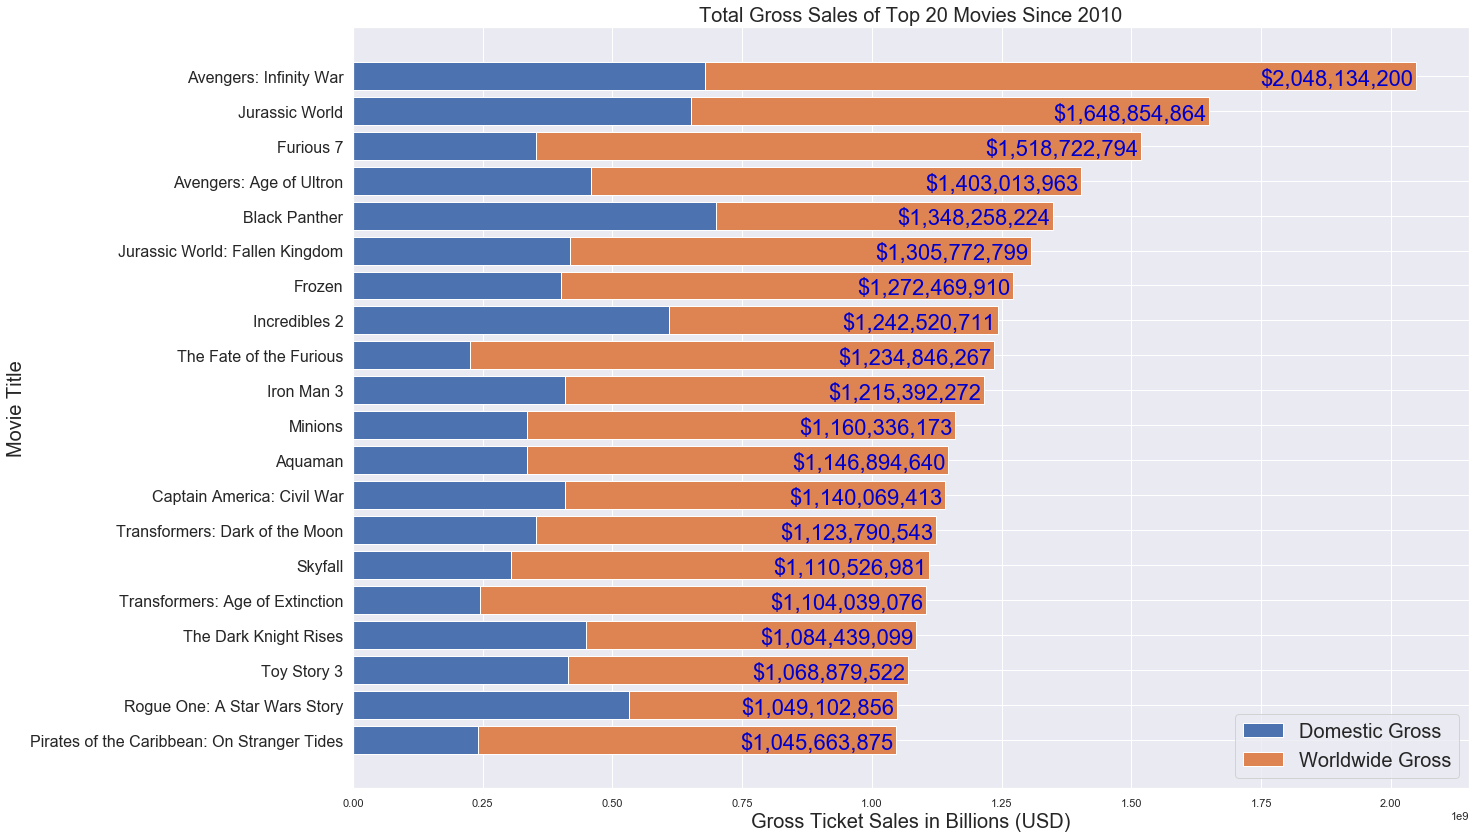

In [555]:
fig, ax = plt.subplots(figsize=(20,14))

ax.barh(df['primary_title'], df['domestic_gross'],label='Domestic Gross')
ax.barh(df['primary_title'],df['worldwide_gross']-df['domestic_gross'],label='Worldwide Gross',left=df['domestic_gross'])
ax.set_title('Total Gross Sales of Top 20 Movies Since 2010', fontdict={'fontsize':20})
plt.xlabel(xlabel='Gross Ticket Sales in Billions (USD)',fontsize='20')
plt.ylabel(ylabel='Movie Title',fontdict={'size':20})
ax.tick_params(axis="y", labelsize=16)
plt.gca().invert_yaxis()
ax.legend(prop={'size':20})
for i, v in enumerate(df['worldwide_gross']):
    ax.text(v - 300000000, i + .25, str(f'${v:,}'), color='mediumblue', fontsize=22)

# What were the top 5 grossing movies since 2010?

    1. Avengers: Infinity War
    2. Jurassic World
    3. Furious 7
    4. Avengers: Age of Ultron
    5. Black Panther


In order to make the graph fit on the slide, I needed to cut it down to just the top 5. It would still illustrate similar data I was trying to present before, just with less points. I was unable to create the same color scheme as the first graph which was frustrating. 

In [972]:
df5 = df[:5]

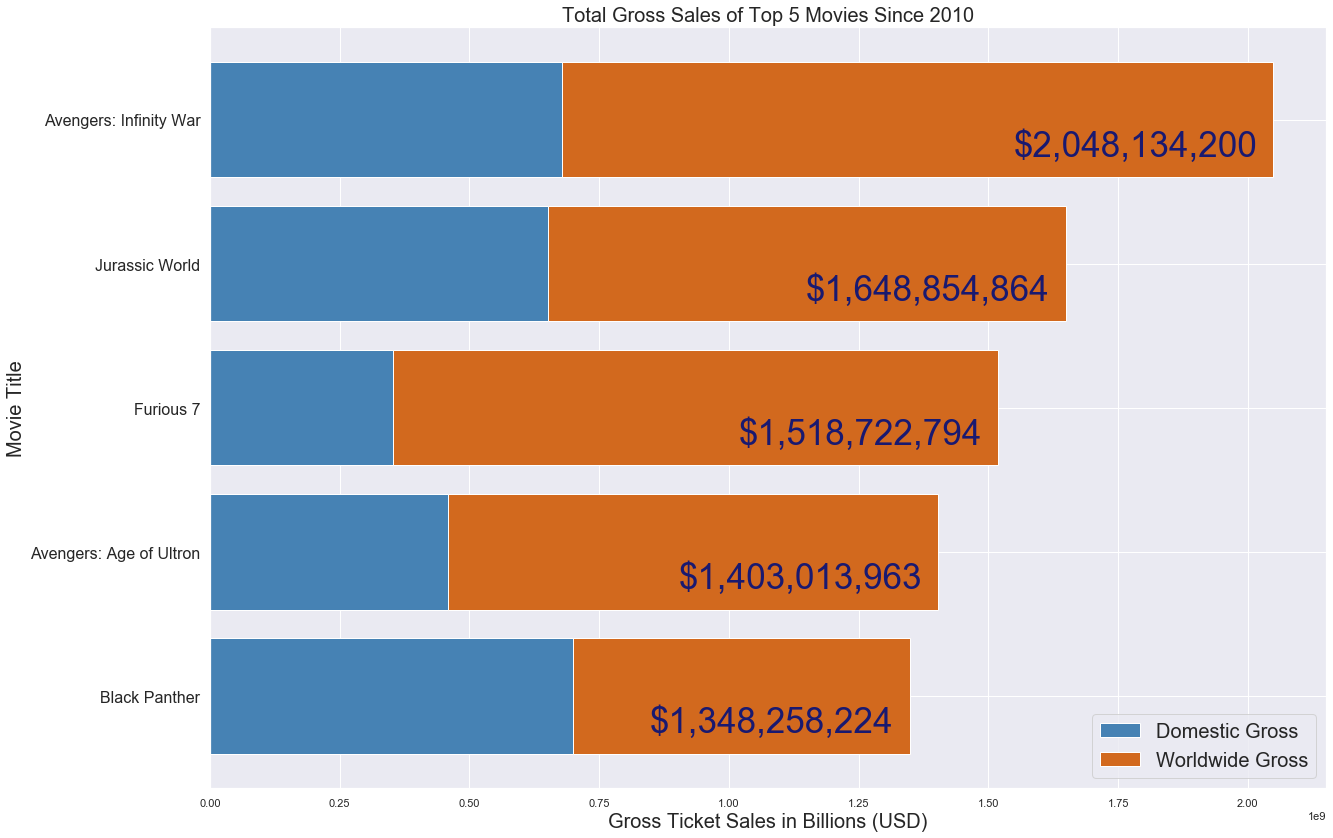

In [990]:
fig, ax = plt.subplots(figsize=(20,14))

ax.barh(df5['primary_title'], df5['domestic_gross'],label='Domestic Gross',color='steelblue')
ax.barh(df5['primary_title'],df5['worldwide_gross']-df5['domestic_gross'],label='Worldwide Gross',left=df5['domestic_gross'], color='chocolate')
ax.set_title('Total Gross Sales of Top 5 Movies Since 2010', fontdict={'fontsize':20})
plt.xlabel(xlabel='Gross Ticket Sales in Billions (USD)',fontsize='20')
plt.ylabel(ylabel='Movie Title',fontdict={'size':20})
ax.tick_params(axis="y", labelsize=16)
plt.gca().invert_yaxis()
ax.legend(prop={'size':20})
for i, v in enumerate(df5['worldwide_gross']):
    ax.text(v - 500000000, i + .25, str(f'${v:,}'), color='midnightblue', fontsize=35)

### Adding a net profit and ROI column
Net profit: profit = worldwide gross - production budget

ROI: profit / production budget

In [100]:
df50['profit'] = df50['worldwide_gross'] - df50['production_budget']
df50

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,profit
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,1748134200
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,1433854864
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,1328722794
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,1072413963
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,1148258224
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,1135772799
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,1122469910
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,1042520711
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,984846267
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,1015392272


In [101]:
df50['roi'] = (df50['profit'] / df50['production_budget'])*100

In [102]:
df50.sort_values('profit',ascending=False,inplace=True)

In [103]:
df50

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,profit,roi
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,1748134200,582.711400
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,1433854864,666.909239
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,1328722794,699.327786
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,1148258224,574.129112
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,1135772799,668.101646
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,1122469910,748.313273
10,Minions,"Adventure,Animation,Comedy",Uni.,74000000,336045770,1160336173,6.4,2015,1086336173,1468.021855
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,1072413963,324.384139
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,1042520711,521.260356
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,1015392272,507.696136


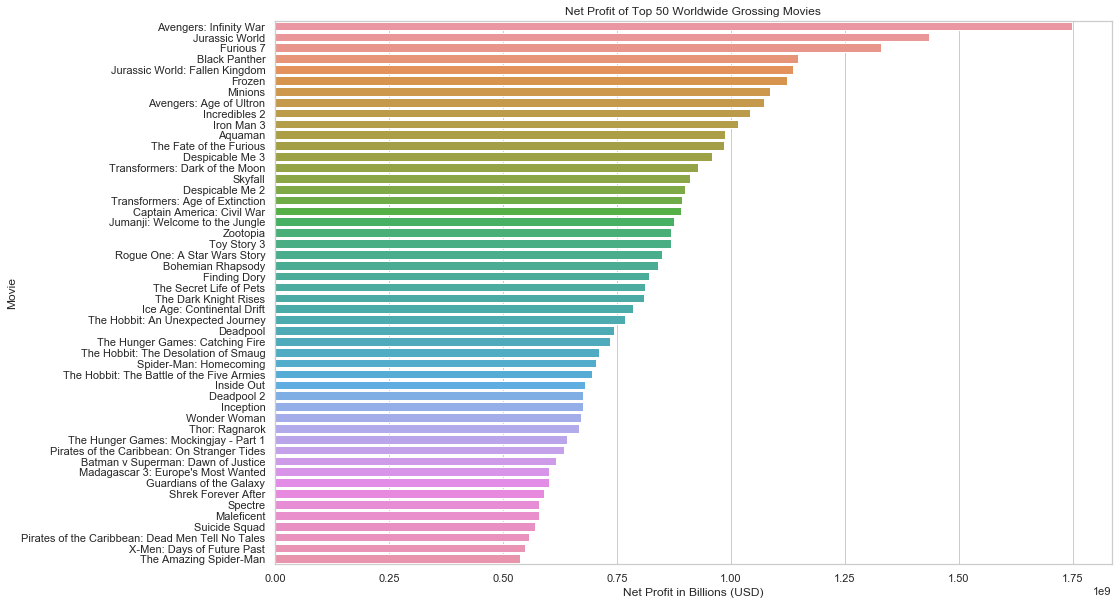

In [865]:
plt.figure(figsize=(15,10))
profit_plot = sns.barplot('profit','primary_title',data=df50,orient='h')
profit_plot.set_xlabel('Net Profit in Billions (USD)')
profit_plot.set_ylabel('Movie')
profit_plot.set_title('Net Profit of Top 50 Worldwide Grossing Movies');

I ran into the same problem here where the graph looked nice but had too many data points to show on a slide. I cut it down to the top 10 for visibility

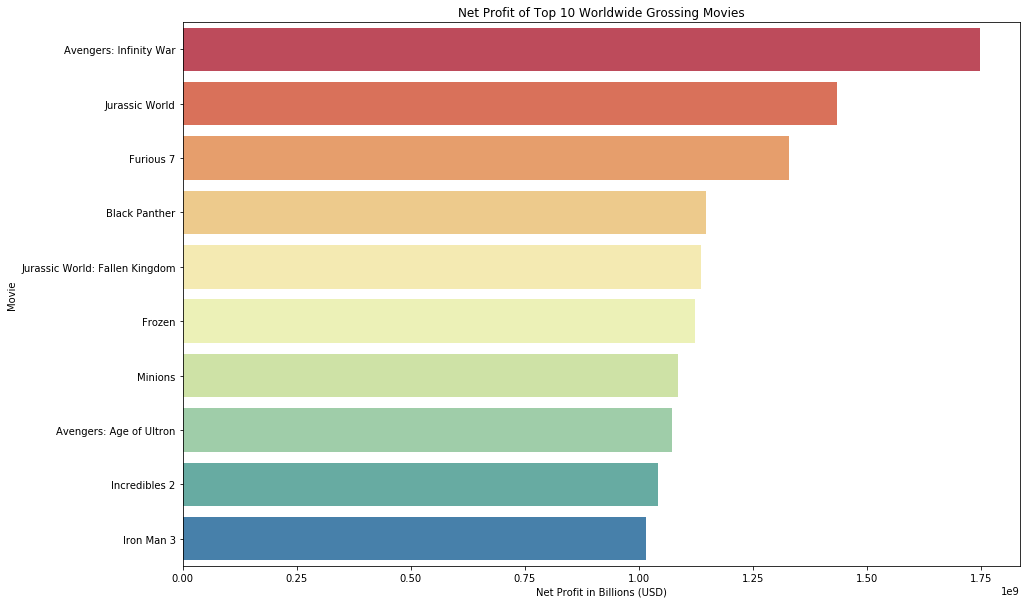

In [110]:
plt.figure(figsize=(15,10))
profit_plot = sns.barplot('profit','primary_title',data=df50[:10],orient='h',palette='Spectral')
profit_plot.set_xlabel('Net Profit in Billions (USD)')
profit_plot.set_ylabel('Movie')
profit_plot.set_title('Net Profit of Top 10 Worldwide Grossing Movies');

# What were the top 5 grossing film genres since 2010?

    1. Action, crime, thriller
    2. Adventure, drama, sport
    3. Action, adventure, animation
    4. Action, adventure, sci-fi
    5. Action, thriller

In [203]:
dfg = df50.groupby('genres').mean().sort_values('worldwide_gross',ascending=False).reset_index()

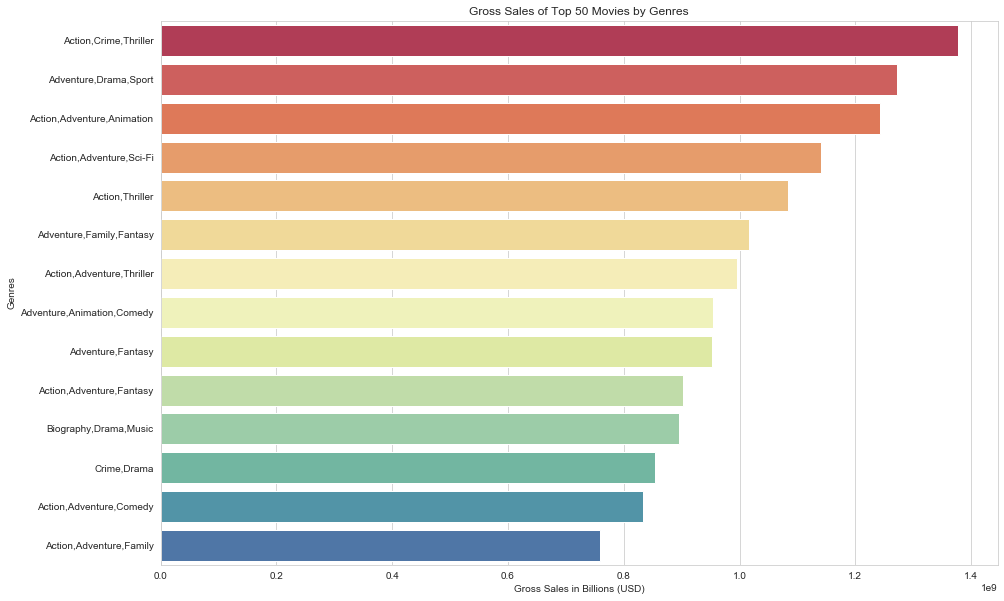

In [204]:
plt.figure(figsize=(15,10))
testg = sns.barplot('worldwide_gross','genres',data=dfg,palette='Spectral')
testg.set_xlabel('Gross Sales in Billions (USD)')
testg.set_ylabel('Genres')
testg.set_title('Gross Sales of Top 50 Movies by Genres');

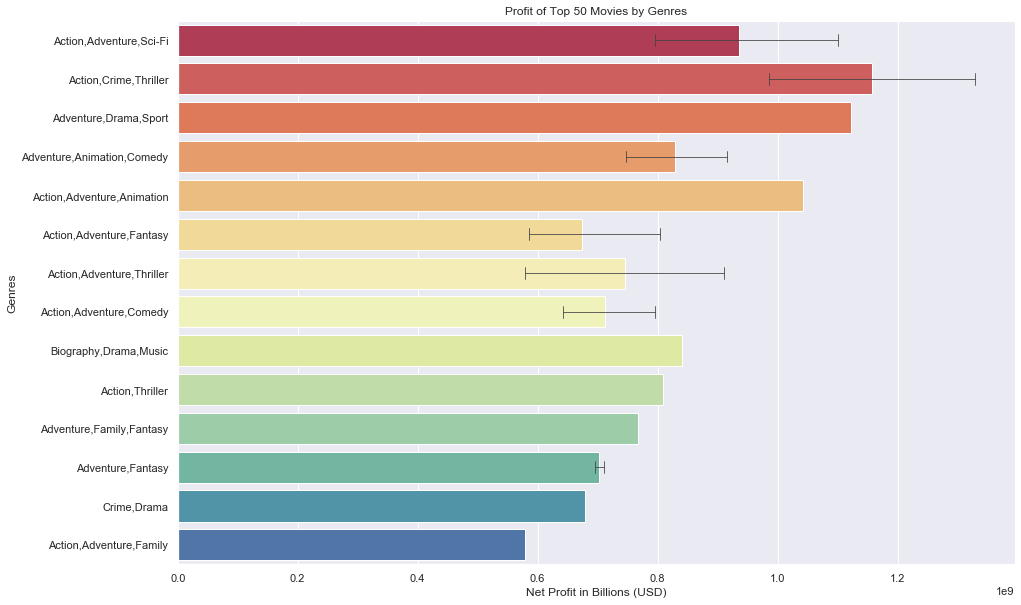

In [686]:
plt.figure(figsize=(15,10))
test1 = sns.barplot('profit','genres',data=df50,palette='Spectral',errwidth=.8,capsize=0.3)
test1.set_xlabel('Net Profit in Billions (USD)')
test1.set_ylabel('Genres')
test1.set_title('Profit of Top 50 Movies by Genres');

## Return on investment (ROI)

In [111]:
df['roi'] = ((df['worldwide_gross']-df['production_budget'])/(df['production_budget']))*100 

In [112]:
df

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,director,writer,roi
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,Anthony Russo,Christopher Markus,582.711400
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,Colin Trevorrow,Rick Jaffa,666.909239
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,James Wan,Chris Morgan,699.327786
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,Joss Whedon,Joss Whedon,324.384139
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,Ryan Coogler,Ryan Coogler,574.129112
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,J.A. Bayona,Derek Connolly,668.101646
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,Adam Green,Adam Green,748.313273
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,Brad Bird,Brad Bird,521.260356
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,F. Gary Gray,Gary Scott Thompson,393.938507
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,Shane Black,Drew Pearce,507.696136


In [113]:
dfroi_sorted = df.sort_values('roi',ascending=False)

In [114]:
dfroi_sorted

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,director,writer,roi
10,Minions,"Adventure,Animation,Comedy",Uni.,74000000,336045770,1160336173,6.4,2015,Pierre Coffin,Brian Lynch,1468.021855
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,Adam Green,Adam Green,748.313273
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,James Wan,Chris Morgan,699.327786
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,J.A. Bayona,Derek Connolly,668.101646
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,Colin Trevorrow,Rick Jaffa,666.909239
11,Aquaman,"Action,Adventure,Fantasy",WB,160000000,335061807,1146894640,7.1,2018,James Wan,David Leslie Johnson-McGoldrick,616.809150
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,Anthony Russo,Christopher Markus,582.711400
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,Ryan Coogler,Ryan Coogler,574.129112
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,Brad Bird,Brad Bird,521.260356
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,Shane Black,Drew Pearce,507.696136


The original df only had the top 20 grossing movies since 2010. Again, I wanted to investigate further so I expanded the dataframe to include the top 50 movies.

In [115]:
df50_roi = df50.sort_values('roi',ascending=False)
df50_roi

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,profit,roi
28,Bohemian Rhapsody,"Biography,Drama,Music",Fox,55000000,216303339,894985342,8.0,2018,839985342,1527.246076
10,Minions,"Adventure,Animation,Comedy",Uni.,74000000,336045770,1160336173,6.4,2015,1086336173,1468.021855
39,Deadpool,"Action,Adventure,Comedy",Fox,58000000,363070709,801025593,8.0,2016,743025593,1281.078609
20,Despicable Me 3,"Adventure,Animation,Comedy",Uni.,75000000,264624300,1034727750,6.3,2017,959727750,1279.637000
24,Despicable Me 2,"Adventure,Animation,Comedy",Uni.,76000000,368065385,975216835,7.4,2013,899216835,1183.180046
29,The Secret Life of Pets,"Adventure,Animation,Comedy",Uni.,75000000,368384330,886750534,6.5,2016,811750534,1082.334045
25,Jumanji: Welcome to the Jungle,"Action,Adventure,Comedy",Sony,90000000,404508916,964496193,7.0,2017,874496193,971.662437
31,Ice Age: Continental Drift,"Adventure,Animation,Comedy",Fox,95000000,161321843,879765137,6.6,2012,784765137,826.068565
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,1122469910,748.313273
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,1328722794,699.327786


## Movies vs ROI

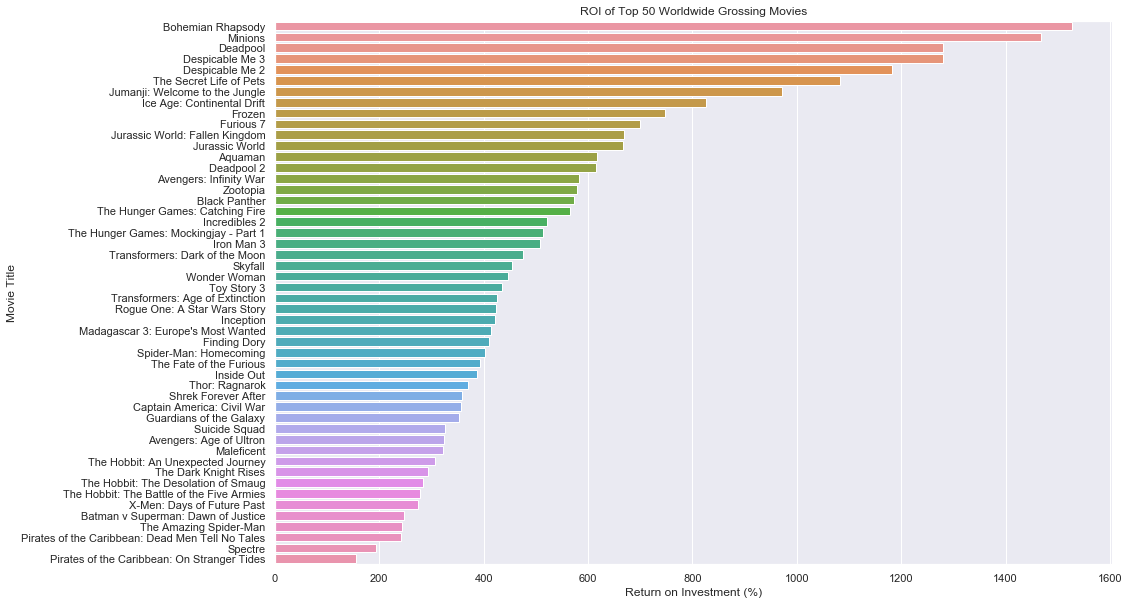

In [695]:
plt.figure(figsize=(15,10))
movieroi_plot = sns.barplot('roi','primary_title',data=df50_roi,orient='h')
movieroi_plot.set_xlabel('Return on Investment (%)')
movieroi_plot.set_ylabel('Movie Title')
movieroi_plot.set_title('ROI of Top 50 Worldwide Grossing Movies');

# Is gross sales the best indicator of a successful movie? Profit? Return on investment?

Looking at the tables and graphs above, I believe the best indicator of success in movies is to look at the return on investment. Gross sales is a nice number to flaunt and advertise in the media, but it means nothing if you sold \\$2 billion in tickets but spent \\$1 billion to make your movie. Your profit is then only \\$1 billion, the same amount you spent to produce the movie. Return on investment takes into account all of the cost factors and displays the ratio as a simple percentage. If you have 0\% roi, you made no profit. If you have 100\% roi, you made the same amount of profit as your cost. Anything above 100\% is a great movie performance. Anything below 0\% did not make a profit for the studio.


In [117]:
df20 = df50[:20]

Similar issue again where 50 data points look nice, but won't fit into a slide.

In [118]:
df20_roi = df20.sort_values(['roi'],ascending=False)

In [119]:
df20_roi

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,profit,roi
10,Minions,"Adventure,Animation,Comedy",Uni.,74000000,336045770,1160336173,6.4,2015,1086336173,1468.021855
20,Despicable Me 3,"Adventure,Animation,Comedy",Uni.,75000000,264624300,1034727750,6.3,2017,959727750,1279.637000
24,Despicable Me 2,"Adventure,Animation,Comedy",Uni.,76000000,368065385,975216835,7.4,2013,899216835,1183.180046
25,Jumanji: Welcome to the Jungle,"Action,Adventure,Comedy",Sony,90000000,404508916,964496193,7.0,2017,874496193,971.662437
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,1122469910,748.313273
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,1328722794,699.327786
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,1135772799,668.101646
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,1433854864,666.909239
11,Aquaman,"Action,Adventure,Fantasy",WB,160000000,335061807,1146894640,7.1,2018,986894640,616.809150
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,1748134200,582.711400


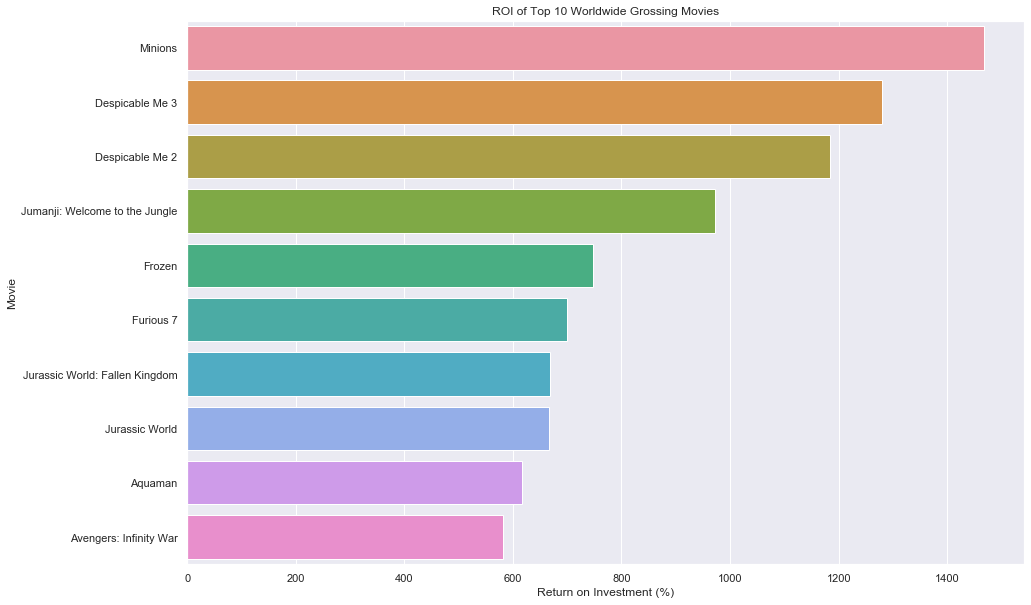

In [1001]:
plt.figure(figsize=(15,10))
movieroi_plot = sns.barplot('roi','primary_title',data=df20_roi[:10],orient='h')
movieroi_plot.set_xlabel('Return on Investment (%)')
movieroi_plot.set_ylabel('Movie')
movieroi_plot.set_title('ROI of Top 10 Worldwide Grossing Movies');

# Which movie genres had the highest ROI since 2010?

    1. Adventure, animation, comedy
    2. Action, adventure, comedy
    3. Adventure, drama, sport
    4. Action, crime, thriller
    5. Action, adventure, sci-fi

## Genre vs ROI

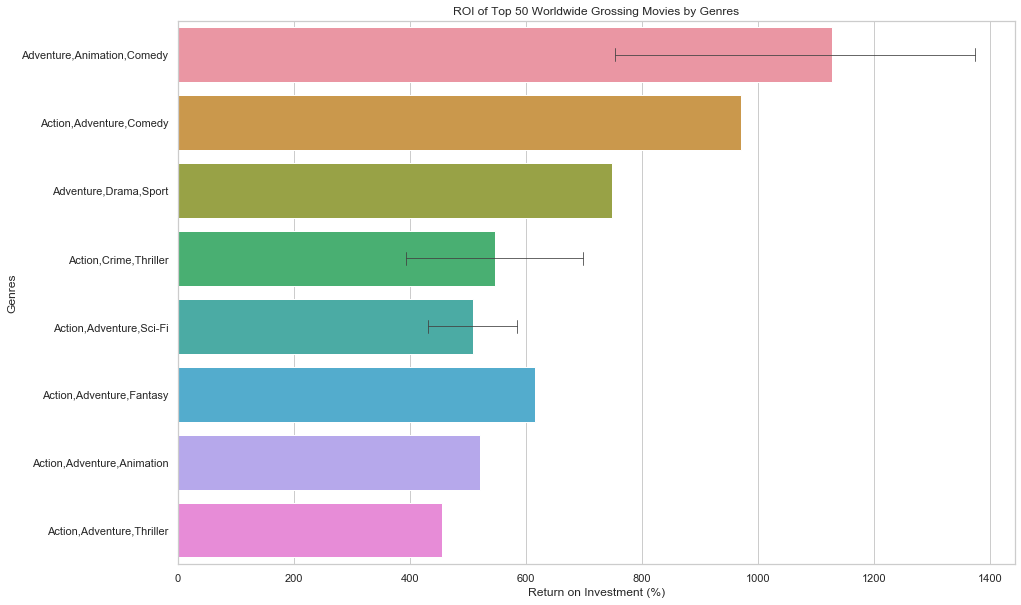

In [887]:
plt.figure(figsize=(15,10))
g_roi = sns.barplot('roi','genres',data=df20_roi, errwidth=.8,capsize=.2)
g_roi.set_xlabel('Return on Investment (%)')
g_roi.set_ylabel('Genres')
g_roi.set_title('ROI of Top 50 Worldwide Grossing Movies by Genres');

## Director vs ROI

# Who were the directors for the top 5 grossing movies since 2010?

    1. Anthony Russo; Avengers; Infinity War
    2. Colin Trevorrow; Jurassic World
    3. James Wan; Furious 7
    4. Joss Whedon; Avengers: Age of Ultron
    5. Ryan Coogler; Black Panther


In [207]:
dfgross_sorted = dfroi_sorted.sort_values('worldwide_gross',ascending= False)
dfgross_sorted

,primary_title,genres,studio,production_budget,domestic_gross,worldwide_gross,IMDBrating,year,director,writer,roi
0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",BV,300000000,678815482,2048134200,8.5,2018,Anthony Russo,Christopher Markus,582.711400
1,Jurassic World,"Action,Adventure,Sci-Fi",Uni.,215000000,652270625,1648854864,7.0,2015,Colin Trevorrow,Rick Jaffa,666.909239
2,Furious 7,"Action,Crime,Thriller",Uni.,190000000,353007020,1518722794,7.2,2015,James Wan,Chris Morgan,699.327786
3,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",BV,330600000,459005868,1403013963,7.3,2015,Joss Whedon,Joss Whedon,324.384139
4,Black Panther,"Action,Adventure,Sci-Fi",BV,200000000,700059566,1348258224,7.3,2018,Ryan Coogler,Ryan Coogler,574.129112
5,Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",Uni.,170000000,417719760,1305772799,6.2,2018,J.A. Bayona,Derek Connolly,668.101646
6,Frozen,"Adventure,Drama,Sport",BV,150000000,400738009,1272469910,6.2,2013,Adam Green,Adam Green,748.313273
7,Incredibles 2,"Action,Adventure,Animation",BV,200000000,608581744,1242520711,7.7,2018,Brad Bird,Brad Bird,521.260356
8,The Fate of the Furious,"Action,Crime,Thriller",Uni.,250000000,225764765,1234846267,6.7,2017,F. Gary Gray,Gary Scott Thompson,393.938507
9,Iron Man 3,"Action,Adventure,Sci-Fi",BV,200000000,408992272,1215392272,7.2,2013,Shane Black,Drew Pearce,507.696136


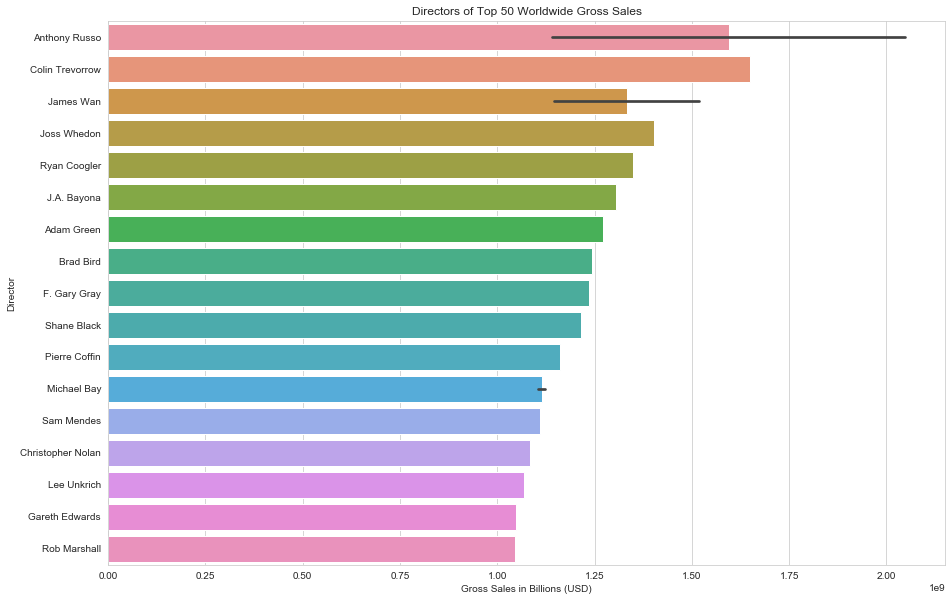

In [211]:
plt.figure(figsize=(15,10))
d = sns.barplot('worldwide_gross','director',data = dfgross_sorted)
d.set_xlabel('Gross Sales in Billions (USD)')
d.set_ylabel('Director')
d.set_title('Directors of Top 50 Worldwide Gross Sales');

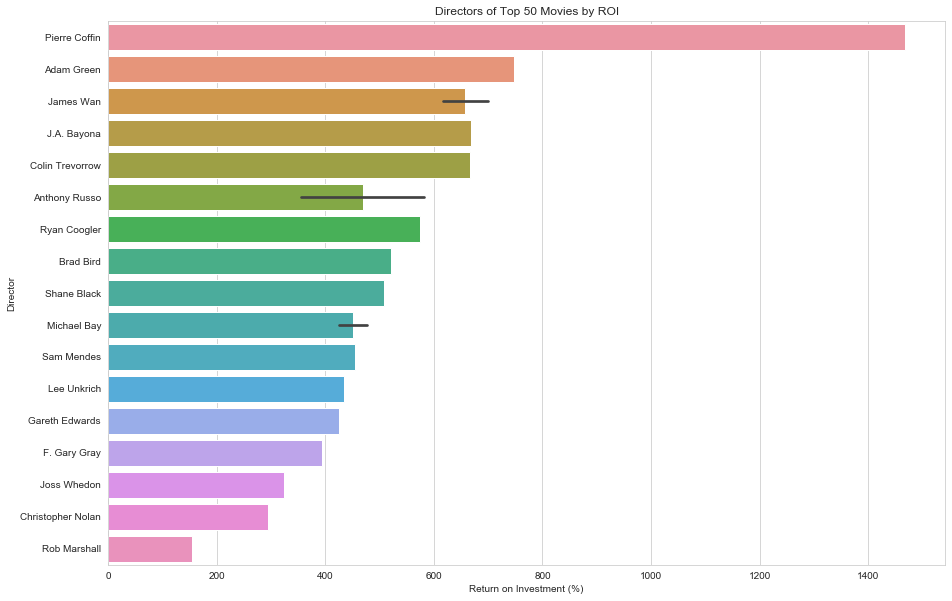

In [213]:
plt.figure(figsize=(15,10))
d = sns.barplot('roi','director',data = dfroi_sorted)
d.set_xlabel('Return on Investment (%)')
d.set_ylabel('Director')
d.set_title('Directors of Top 50 Movies by ROI');

# Reviews
I wanted to identify the keywords that critics were using when describing positively rated movies vs negatively rated movies. I needed to ensure that the reviews were submitted by top critics and not your average internet user in order to increase the likelihood of a reliable review. I wanted to make a word cloud of all the keywords, but as you will see, this did not work out very well. There were too many stop words to include when going through the reviews and even after getting the words that I wanted, I found out that both the positive and negative reviews shared many of the same keywords. This endeavor was eventually abandoned but I wanted to keep it in my notebook for future reference.

In [751]:
dfreviews[dfreviews['top_critic'] == 1]

,id,review,rating,fresh,critic,top_critic,publisher,date
24,3,"The rapid dialogue is dry and mannered, like a...",2.5/4,rotten,Joe Williams,1,St. Louis Post-Dispatch,2012-09-06
47,3,It feels like each and every moment bursts for...,2/4,rotten,Stephanie Merry,1,Washington Post,2012-08-24
50,3,"There's not really a movie there, nothing that...",2/4,rotten,Mick LaSalle,1,San Francisco Chronicle,2012-08-23
54,3,The film is all too faithful to its un-cinemat...,1.5/4,rotten,Colin Covert,1,Minneapolis Star Tribune,2012-08-23
55,3,"Cosmopolis,"" because of its allegiance to the ...",2/4,rotten,Moira MacDonald,1,Seattle Times,2012-08-23
...,...,...,...,...,...,...,...,...
54419,2000,"Sleek, shallow, but frequently amusing.",2.5/4,fresh,Gene Seymour,1,Newsday,2002-09-27
54420,2000,The spaniel-eyed Jean Reno infuses Hubert with...,3/4,fresh,Megan Turner,1,New York Post,2002-09-27
54424,2000,Dawdles and drags when it should pop; it doesn...,1.5/5,rotten,Manohla Dargis,1,Los Angeles Times,2002-09-26
54426,2000,The film lapses too often into sugary sentimen...,NaN,rotten,Paul Malcolm,1,L.A. Weekly,2002-09-26


In [755]:
fresh_review = dfreviews[(dfreviews['fresh'] == 'fresh') & (dfreviews['top_critic'] == 1)]

In [765]:
rotten_review = dfreviews[(dfreviews['fresh'] == 'rotten') & (dfreviews['top_critic'] == 1)]

In [741]:
from wordcloud import WordCloud,STOPWORDS

In [756]:
fresh_list = []
for review in fresh_review['review']:
    fresh_list.append(review)

In [757]:
fresh_string = " ".join([str(i) for i in fresh_list]) 

In [759]:
fresh_string = fresh_string.replace('film','').replace('nan','').replace('the','').replace('film','')

In [760]:
fresh_string = fresh_string.replace('The','').replace('movie','').replace('one','').replace('This','').replace(
    'of','').replace('is','').replace('to','').replace('in','')

In [763]:
fresh_string = fresh_string.replace('th','').replace('sry','').replace('ir','').replace('ha','').replace(
    'doe','').replace('way','').replace('wi','').replace('cracter','character').replace('wt','')

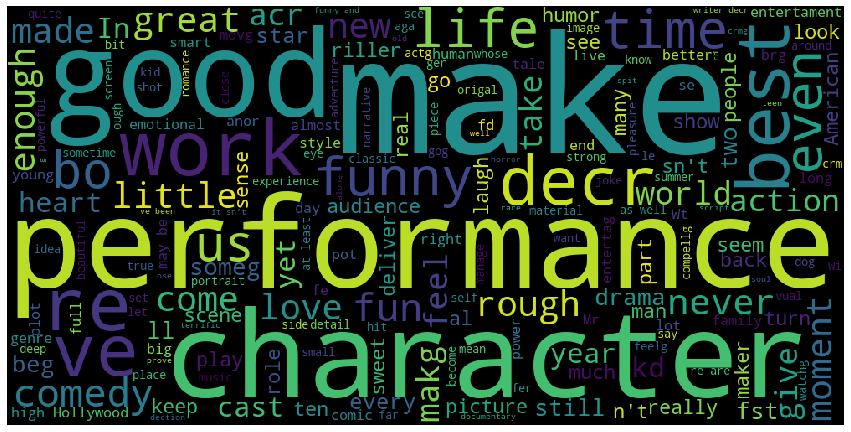

In [764]:
stopwords = set(STOPWORDS)
stopwords.update(["stopword1", "stopword2"])
fresh_wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(fresh_string)
plt.figure(figsize=(15,8))
plt.imshow(fresh_wordcloud)
plt.axis("off")
plt.show()

In [766]:
rotten_list = []
for review in rotten_review['review']:
    rotten_list.append(review)
    
rotten_string = " ".join([str(i) for i in rotten_list])

In [769]:
rotten_string = rotten_string.replace('film','').replace('nan','').replace('the','').replace('The','').replace('movie','').replace('one','').replace('This','').replace(
    'of','').replace('is','').replace('to','').replace('in','').replace('th','').replace('sry','').replace('ir','').replace('ha','').replace(
    'doe','').replace('way','').replace('wi','').replace('cracter','character').replace('wt','')

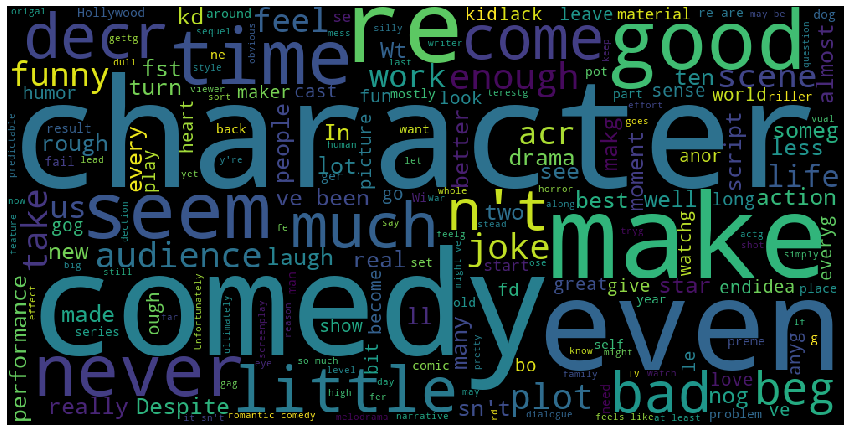

In [888]:
stopwords = set(STOPWORDS)
stopwords.update(["stopword1", "stopword2"])
rotten_wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(rotten_string)
plt.figure(figsize=(15,8))
plt.imshow(rotten_wordcloud)
plt.axis("off")
plt.show()

# Finding Total Worldwide Gross Yearly Trend

In [773]:
dfbudgets['production_budget'] = dfbudgets['production_budget'].str.replace('$','').str.replace(',','').str.strip().astype(int)

In [120]:
dfbudgets['release_year'] = dfbudgets['release_date'].dt.year

In [121]:
dfgross_year = dfbudgets.groupby('release_year', as_index=False).agg(
    {"worldwide_gross": "sum"}).sort_values('release_year',ascending=False)

In [122]:
dfgross_year = dfgross_year[dfgross_year['release_year'] >= 2010]

In [133]:
dfgross_year.drop(index=95,inplace=True)

In [134]:
dfgross_year

,release_year,worldwide_gross
94,2019,6676825346
93,2018,26094444899
92,2017,28429629005
91,2016,28768152741
90,2015,27800988606
89,2014,25273926856
88,2013,26359757029
87,2012,27183123906
86,2011,24675265419
85,2010,24231912708


<Figure size 432x288 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

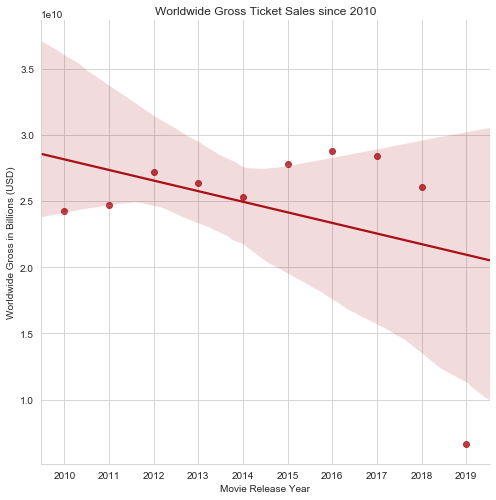

In [135]:
sns.set_style('whitegrid')
sns.set_palette('Reds_r')
sns.despine()
plt.figure(figsize=(25,12))
gross_year = sns.lmplot('release_year','worldwide_gross',data=dfgross_year,height=7)
gross_year.set(xlabel= 'Movie Release Year',ylabel='Worldwide Gross in Billions (USD)',
               title='Worldwide Gross Ticket Sales since 2010',xticks=dfgross_year['release_year']);

In [136]:
without_2019 = dfgross_year.drop(index=94)
without_2019

,release_year,worldwide_gross
93,2018,26094444899
92,2017,28429629005
91,2016,28768152741
90,2015,27800988606
89,2014,25273926856
88,2013,26359757029
87,2012,27183123906
86,2011,24675265419
85,2010,24231912708


<Figure size 432x288 with 0 Axes>

<Figure size 1800x864 with 0 Axes>

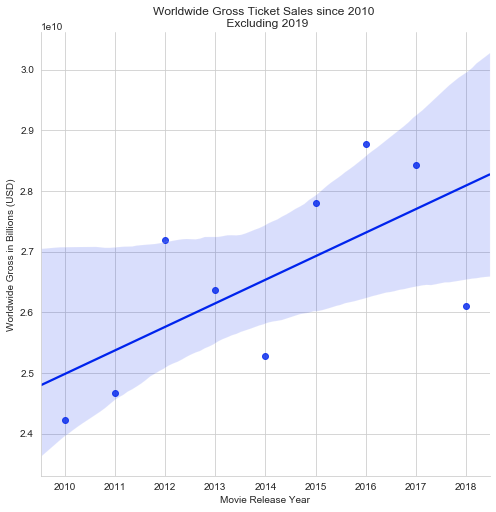

In [142]:
sns.set_style('whitegrid')
sns.set_palette('winter')
sns.despine()
plt.figure(figsize=(25,12))
gross_year = sns.lmplot('release_year','worldwide_gross',data=without_2019,height=7)
gross_year.set(xlabel= 'Movie Release Year',ylabel='Worldwide Gross in Billions (USD)',
               title='Worldwide Gross Ticket Sales since 2010 \n Excluding 2019');

# Relationships between factors
### ROI vs Gross

In [143]:
dfbudgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [144]:
dftitles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [145]:
query5 = """
Select
    primary_title, production_budget, domestic_gross, worldwide_gross
From
    dftitles t
Join
    dfbudgets b ON b.movie = t.primary_title
ORDER BY
    b.worldwide_gross DESC
"""

dfscatter = pysqldf(query5)

In [151]:
dfscatter = dfscatter[dfscatter['worldwide_gross'] != 0] # wanted to exclude from the scatter plot any movie that did not make any money internationally

In [149]:
dfscatter['profit'] = dfscatter['worldwide_gross'] - dfscatter['production_budget']

In [150]:
dfscatter['roi'] = dfscatter['profit'] / dfscatter['production_budget']
dfscatter

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi
0,Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,Titanic,200000000,659363944,2208208395,2008208395,10.041042
2,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
3,Jurassic World,215000000,652270625,1648854864,1433854864,6.669092
4,Furious 7,190000000,353007020,1518722794,1328722794,6.993278
...,...,...,...,...,...,...
2148,Higher Power,500000,528,528,-499472,-0.998944
2149,Bang,10000,527,527,-9473,-0.947300
2150,Destiny,750000,0,450,-749550,-0.999400
2151,Food Chains,913000,0,176,-912824,-0.999807


In [152]:
dfscatter['roi'] = dfscatter['roi'] * 100

In [153]:
dfscatter

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,Titanic,200000000,659363944,2208208395,2008208395,1004.104198
2,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400
3,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239
4,Furious 7,190000000,353007020,1518722794,1328722794,699.327786
...,...,...,...,...,...,...
2148,Higher Power,500000,528,528,-499472,-99.894400
2149,Bang,10000,527,527,-9473,-94.730000
2150,Destiny,750000,0,450,-749550,-99.940000
2151,Food Chains,913000,0,176,-912824,-99.980723


### Removing outliers

In [154]:
dfscatter.sort_values('roi',inplace=False).tail(10)

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi
274,Cinderella,2900000,85000000,263591415,260691415,8989.359138
1289,Graduation Day,250000,23894000,23894000,23644000,9457.600000
1517,The Birth of a Nation,110000,10000000,11000000,10890000,9900.000000
631,The Devil Inside,1000000,53262945,101759490,100759490,10075.949000
392,Snow White and the Seven Dwarfs,1488000,184925486,184925486,183437486,12327.788038
834,Halloween,325000,47000000,70000000,69675000,21438.461538
322,Rocky,1000000,117235147,225000000,224000000,22400.000000
1207,Night of the Living Dead,114000,12087064,30087064,29973064,26292.161404
271,Bambi,858000,102797000,268000000,267142000,31135.431235
1062,The Gallows,100000,22764410,41656474,41556474,41556.474000


In [155]:
Q1_roi = dfscatter['roi'].quantile(0.25)
Q3_roi = dfscatter['roi'].quantile(0.75)
IQR = Q3_roi - Q1_roi
print(IQR)

325.17579666666666


In [156]:
dfscatter['outlier'] = ((dfscatter['roi'] < (Q1_roi - 1.5 * IQR)) |(dfscatter['roi'] > (Q3_roi + 1.5 * IQR)))

In [157]:
dfscatter_o = dfscatter[dfscatter['outlier'] == False]
dfscatter_o

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713,False
2,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,False
3,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239,False
4,Furious 7,190000000,353007020,1518722794,1328722794,699.327786,False
5,The Avengers,225000000,623279547,1517935897,1292935897,574.638176,False
...,...,...,...,...,...,...,...
2148,Higher Power,500000,528,528,-499472,-99.894400,False
2149,Bang,10000,527,527,-9473,-94.730000,False
2150,Destiny,750000,0,450,-749550,-99.940000,False
2151,Food Chains,913000,0,176,-912824,-99.980723,False


In [158]:
query7 = """
SELECT
    o.*, t.genres
From
    dfscatter_o o 
Join
    dftitles t USING(primary_title)
"""
df_roi_genre = pysqldf(query7)

In [159]:
df_roi_genre

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713,0,Horror
1,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,0,"Action,Adventure,Sci-Fi"
2,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239,0,"Action,Adventure,Sci-Fi"
3,Furious 7,190000000,353007020,1518722794,1328722794,699.327786,0,"Action,Crime,Thriller"
4,The Avengers,225000000,623279547,1517935897,1292935897,574.638176,0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
1966,Higher Power,500000,528,528,-499472,-99.894400,0,"Action,Sci-Fi,Thriller"
1967,Bang,10000,527,527,-9473,-94.730000,0,None
1968,Destiny,750000,0,450,-749550,-99.940000,0,Action
1969,Food Chains,913000,0,176,-912824,-99.980723,0,Documentary


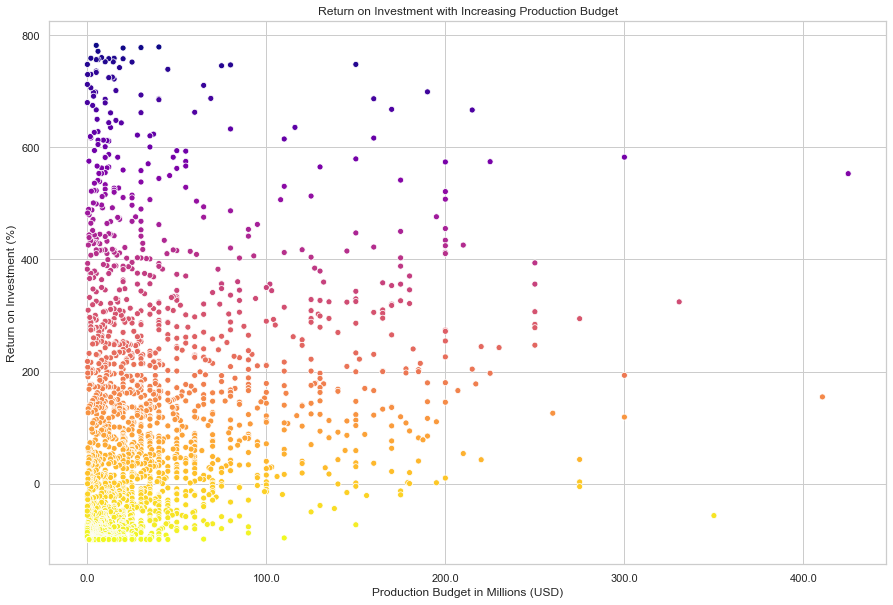

In [1153]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
g = sns.scatterplot('production_budget','roi',data=df_roi_genre,hue='roi',palette='plasma_r')
xlabels = ['{}'.format(x) for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
g.legend_.remove()
g.set(xlabel='Production Budget in Millions (USD)',ylabel='Return on Investment (%)',
      title='Return on Investment with Increasing Production Budget');

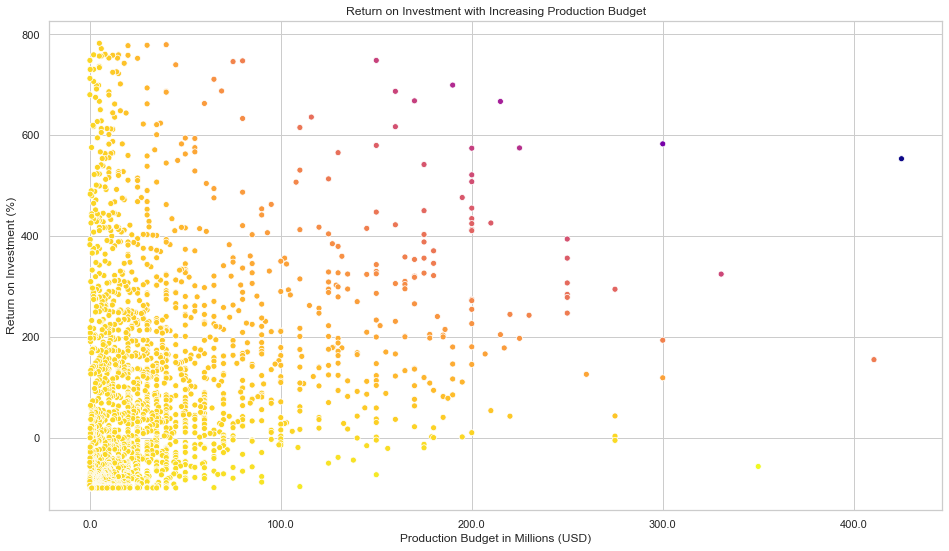

In [1208]:
plt.figure(figsize=(16,9))
sns.set_style('whitegrid')
g = sns.scatterplot('production_budget','roi',data=df_roi_genre,hue='profit',palette='plasma_r')
xlabels = ['{}'.format(x) for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)
g.legend_.remove()
g.set(xlabel='Production Budget in Millions (USD)',ylabel='Return on Investment (%)',
      title='Return on Investment with Increasing Production Budget');

### Finding percentage of high ROI films in 100 - 200 mil range

In [175]:
df_compare_roi = df_roi_genre[(df_roi_genre['production_budget'] >= 100000000) &
                              (df_roi_genre['production_budget'] <= 200000000)]
df_compare_roi

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
3,Furious 7,190000000,353007020,1518722794,1328722794,699.327786,0,"Action,Crime,Thriller"
6,Black Panther,200000000,700059566,1348258224,1148258224,574.129112,0,"Action,Adventure,Sci-Fi"
7,Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,668.101646,0,"Action,Adventure,Sci-Fi"
8,Frozen,150000000,400738009,1272469910,1122469910,748.313273,0,"Adventure,Drama,Sport"
9,Beauty and the Beast,160000000,504014165,1259199706,1099199706,686.999816,0,"Drama,Fantasy,Romance"
...,...,...,...,...,...,...,...,...
655,R.I.P.D.,130000000,33618855,79076678,-50923322,-39.171786,0,"Action,Adventure,Comedy"
674,Stealth,138000000,32116746,76416746,-61583254,-44.625546,0,"Action,Comedy"
773,Monster Trucks,125000000,33370166,61642798,-63357202,-50.685762,0,"Action,Adventure,Comedy"
953,Mars Needs Moms,150000000,21392758,39549758,-110450242,-73.633495,0,"Adventure,Animation,Family"


In [181]:
df_compare_roi_good = df_compare_roi[df_compare_roi['roi'] >=400]
len(df_compare_roi_good)

30

In [182]:
len(df_compare_roi_good) / len(df_compare_roi)

0.14563106796116504

In [183]:
df_compare_roi_bad = df_compare_roi[df_compare_roi['roi'] < 400]
len(df_compare_roi_bad)

176

In [184]:
len(df_compare_roi_bad) / len(df_compare_roi)

0.8543689320388349

### Finding percentage of high ROI films in < 100 mil range

In [185]:
df_compare_low = df_roi_genre[df_roi_genre['production_budget'] < 100000000]
df_compare_low

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
56,The Hunger Games,80000000,408010692,677923379,597923379,747.404224,0,"Action,Adventure,Sci-Fi"
69,Sing,75000000,270329045,634454789,559454789,745.939719,0,"Animation,Comedy,Family"
80,The Hangover Part II,80000000,254464305,586464305,506464305,633.080381,0,"Comedy,Mystery"
90,Despicable Me,69000000,251513985,543464573,474464573,687.629816,0,"Animation,Comedy,Family"
93,Cinderella,95000000,201151353,534551353,439551353,462.685635,0,Musical
...,...,...,...,...,...,...,...,...
1966,Higher Power,500000,528,528,-499472,-99.894400,0,"Action,Sci-Fi,Thriller"
1967,Bang,10000,527,527,-9473,-94.730000,0,None
1968,Destiny,750000,0,450,-749550,-99.940000,0,Action
1969,Food Chains,913000,0,176,-912824,-99.980723,0,Documentary


In [186]:
df_compare_low_good = df_compare_low[df_compare_low['roi'] >= 400]
df_compare_low_good

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
56,The Hunger Games,80000000,408010692,677923379,597923379,747.404224,0,"Action,Adventure,Sci-Fi"
69,Sing,75000000,270329045,634454789,559454789,745.939719,0,"Animation,Comedy,Family"
80,The Hangover Part II,80000000,254464305,586464305,506464305,633.080381,0,"Comedy,Mystery"
90,Despicable Me,69000000,251513985,543464573,474464573,687.629816,0,"Animation,Comedy,Family"
93,Cinderella,95000000,201151353,534551353,439551353,462.685635,0,Musical
...,...,...,...,...,...,...,...,...
1655,Weekend,190000,484592,1577585,1387585,730.307895,0,"Drama,Romance"
1682,The Overnight,200000,1109808,1165996,965996,482.998000,0,None
1771,Tiny Furniture,50000,391674,424149,374149,748.298000,0,"Comedy,Drama,Romance"
1777,The Signal,50000,251150,406299,356299,712.598000,0,"Drama,Mystery,Sci-Fi"


In [187]:
df_compare_low_bad = df_compare_low[df_compare_low['roi'] < 400]
df_compare_low_bad

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
133,Kingsman: The Secret Service,94000000,128261724,404561724,310561724,330.384813,0,"Action,Adventure,Comedy"
140,The Greatest Showman,84000000,174340174,386665550,302665550,360.316131,0,"Biography,Drama,Musical"
146,Hotel Transylvania,85000000,148313048,378505812,293505812,345.300955,0,"Animation,Comedy,Family"
159,Shazam!,85000000,139606856,362899733,277899733,326.940862,0,"Action,Adventure,Comedy"
164,The Angry Birds Movie,73000000,107509366,352327887,279327887,382.640941,0,"Action,Animation,Comedy"
...,...,...,...,...,...,...,...,...
1966,Higher Power,500000,528,528,-499472,-99.894400,0,"Action,Sci-Fi,Thriller"
1967,Bang,10000,527,527,-9473,-94.730000,0,None
1968,Destiny,750000,0,450,-749550,-99.940000,0,Action
1969,Food Chains,913000,0,176,-912824,-99.980723,0,Documentary


In [188]:
len(df_compare_low_good) / len(df_compare_low)

0.10887096774193548

In [189]:
len(df_compare_low_bad) / len(df_compare_low)

0.8911290322580645

### Finding percentage of high ROI films in >200 mil range

In [191]:
df_compare_high = df_roi_genre[df_roi_genre['production_budget'] > 200000000]
df_compare_high

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713,0,Horror
1,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,0,"Action,Adventure,Sci-Fi"
2,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239,0,"Action,Adventure,Sci-Fi"
4,The Avengers,225000000,623279547,1517935897,1292935897,574.638176,0,"Action,Adventure,Sci-Fi"
5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,0,"Action,Adventure,Sci-Fi"
11,The Fate of the Furious,250000000,225764765,1234846267,984846267,393.938507,0,"Action,Crime,Thriller"
14,Captain America: Civil War,250000000,408084349,1140069413,890069413,356.027765,0,"Action,Adventure,Sci-Fi"
18,Transformers: Age of Extinction,210000000,245439076,1104039076,894039076,425.732893,0,"Action,Adventure,Sci-Fi"
19,The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.341491,0,"Action,Thriller"
22,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,0,"Action,Adventure,Fantasy"


In [192]:
df_compare_high_good = df_compare_high[df_compare_high['roi'] >= 400]
df_compare_high_good

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713,0,Horror
1,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,582.711400,0,"Action,Adventure,Sci-Fi"
2,Jurassic World,215000000,652270625,1648854864,1433854864,666.909239,0,"Action,Adventure,Sci-Fi"
4,The Avengers,225000000,623279547,1517935897,1292935897,574.638176,0,"Action,Adventure,Sci-Fi"
18,Transformers: Age of Extinction,210000000,245439076,1104039076,894039076,425.732893,0,"Action,Adventure,Sci-Fi"


In [193]:
df_compare_high_bad = df_compare_high[df_compare_high['roi'] < 400]
df_compare_high_bad

,primary_title,production_budget,domestic_gross,worldwide_gross,profit,roi,outlier,genres
5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139,0,"Action,Adventure,Sci-Fi"
11,The Fate of the Furious,250000000,225764765,1234846267,984846267,393.938507,0,"Action,Crime,Thriller"
14,Captain America: Civil War,250000000,408084349,1140069413,890069413,356.027765,0,"Action,Adventure,Sci-Fi"
19,The Dark Knight Rises,275000000,448139099,1084439099,809439099,294.341491,0,"Action,Thriller"
22,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286,0,"Action,Adventure,Fantasy"
26,The Hobbit: An Unexpected Journey,250000000,303003568,1017003568,767003568,306.801427,0,"Adventure,Family,Fantasy"
28,The Hobbit: The Desolation of Smaug,250000000,258366855,960366855,710366855,284.146742,0,"Adventure,Fantasy"
29,The Hobbit: The Battle of the Five Armies,250000000,255119788,945577621,695577621,278.231048,0,"Adventure,Fantasy"
31,Spectre,300000000,200074175,879620923,579620923,193.206974,0,"Action,Adventure,Thriller"
32,Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,247.000112,0,"Action,Adventure,Fantasy"


In [194]:
len(df_compare_high_good) / len(df_compare_high)

0.1724137931034483

In [195]:
len(df_compare_high_bad) / len(df_compare_high)

0.8275862068965517

### ROI by genre

In [160]:
df_roi_mean_sorted = df_roi_genre[:50].groupby('genres').mean().sort_values('roi',ascending=False)

In [161]:
df_roi_mean_sorted.reset_index(inplace=True)

Text(0.5, 1.0, 'ROI of Top 50 Grossing Movies by Genre')

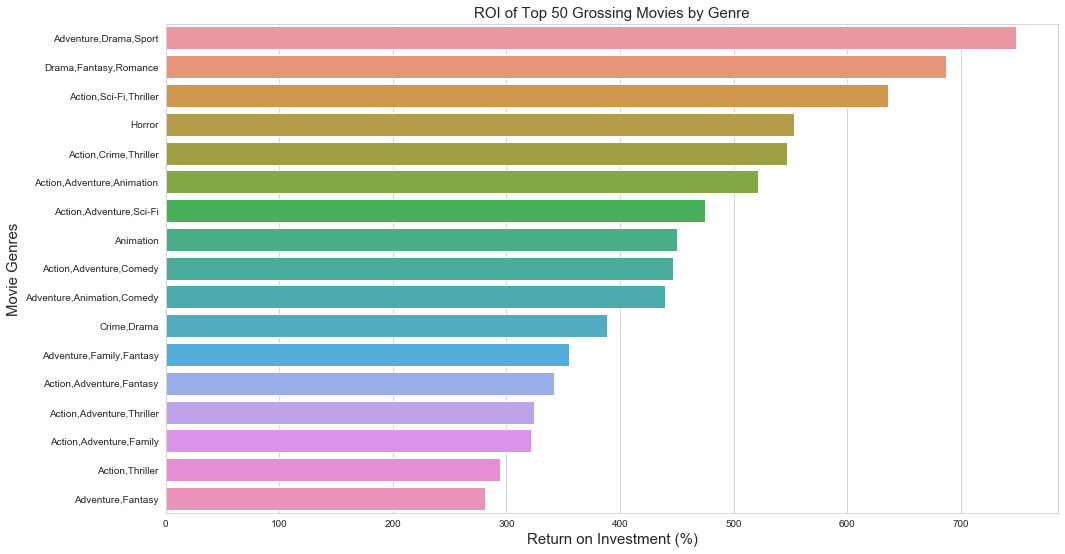

In [162]:
plt.figure(figsize=(16,9))
groi = sns.barplot('roi','genres',data=df_roi_mean_sorted,orient='h')
groi.set_xlabel('Return on Investment (%)',size=15)
groi.set_ylabel('Movie Genres',size=15)
groi.set_title('ROI of Top 50 Grossing Movies by Genre',size=15)

# Studio Distribution

This was another failed endeavor. I wanted to include other charts besides bar and scatter. The waffleplot looked very interesting to use and I wanted to find a good statistic to use it on. I tried to use the top grossing studios to find out which studios Microsoft should attempt to emulate when establishing themselves as a movie studio. This didn't work out for 2 reasons: I didn't think the resulting waffleplot illustrated an important enough statistic to include in my presentation and I could not figure out how to position the legend properly.

In [163]:
df50.dtypes

primary_title         object
genres                object
studio                object
production_budget      int64
domestic_gross         int64
worldwide_gross        int64
IMDBrating           float64
year                   int64
profit                 int64
roi                  float64
dtype: object

In [1003]:
pip install pywaffle

     |████████████████████████████████| 532kB 411kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [165]:
from pywaffle import Waffle

In [164]:
df20['studio']

0       BV
1     Uni.
2     Uni.
4       BV
5     Uni.
6       BV
10    Uni.
3       BV
7       BV
9       BV
11      WB
8     Uni.
20    Uni.
13    P/DW
14    Sony
24    Uni.
15    Par.
12      BV
25    Sony
22      BV
Name: studio, dtype: object

In [166]:
studios = {}
for studio in df20['studio']:
    if studio in studios.keys():
        studios[studio] += 1
    else:
        studios[studio] = 1
        
studios

{'BV': 8, 'Uni.': 7, 'WB': 1, 'P/DW': 1, 'Sony': 2, 'Par.': 1}

In [167]:
studios = {k:v for k,v in sorted(studios.items(),key=lambda x:x[1],reverse=True)}

In [168]:
len(studios)

6

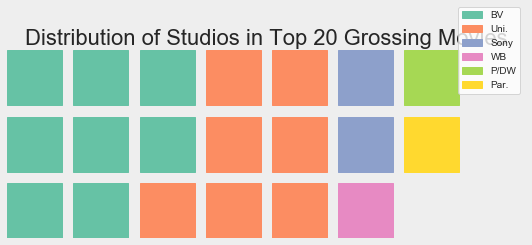

In [169]:
fig = plt.figure(
    FigureClass=Waffle, 
    columns = 8,
    values=studios,
    title={'label': 'Distribution of Studios in Top 20 Grossing Movies', 'loc': 'center','fontsize':22},
    legend={'loc': 'center right', 'bbox_to_anchor': (1, 1)},
    starting_location='NW',

    figsize=(8,6)  # figsize is a parameter of matplotlib.pyplot.figure
)
fig.set_facecolor('#EEEEEE')
plt.show()